## Diffusion-Limited Aggregation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

<IPython.core.display.Javascript object>


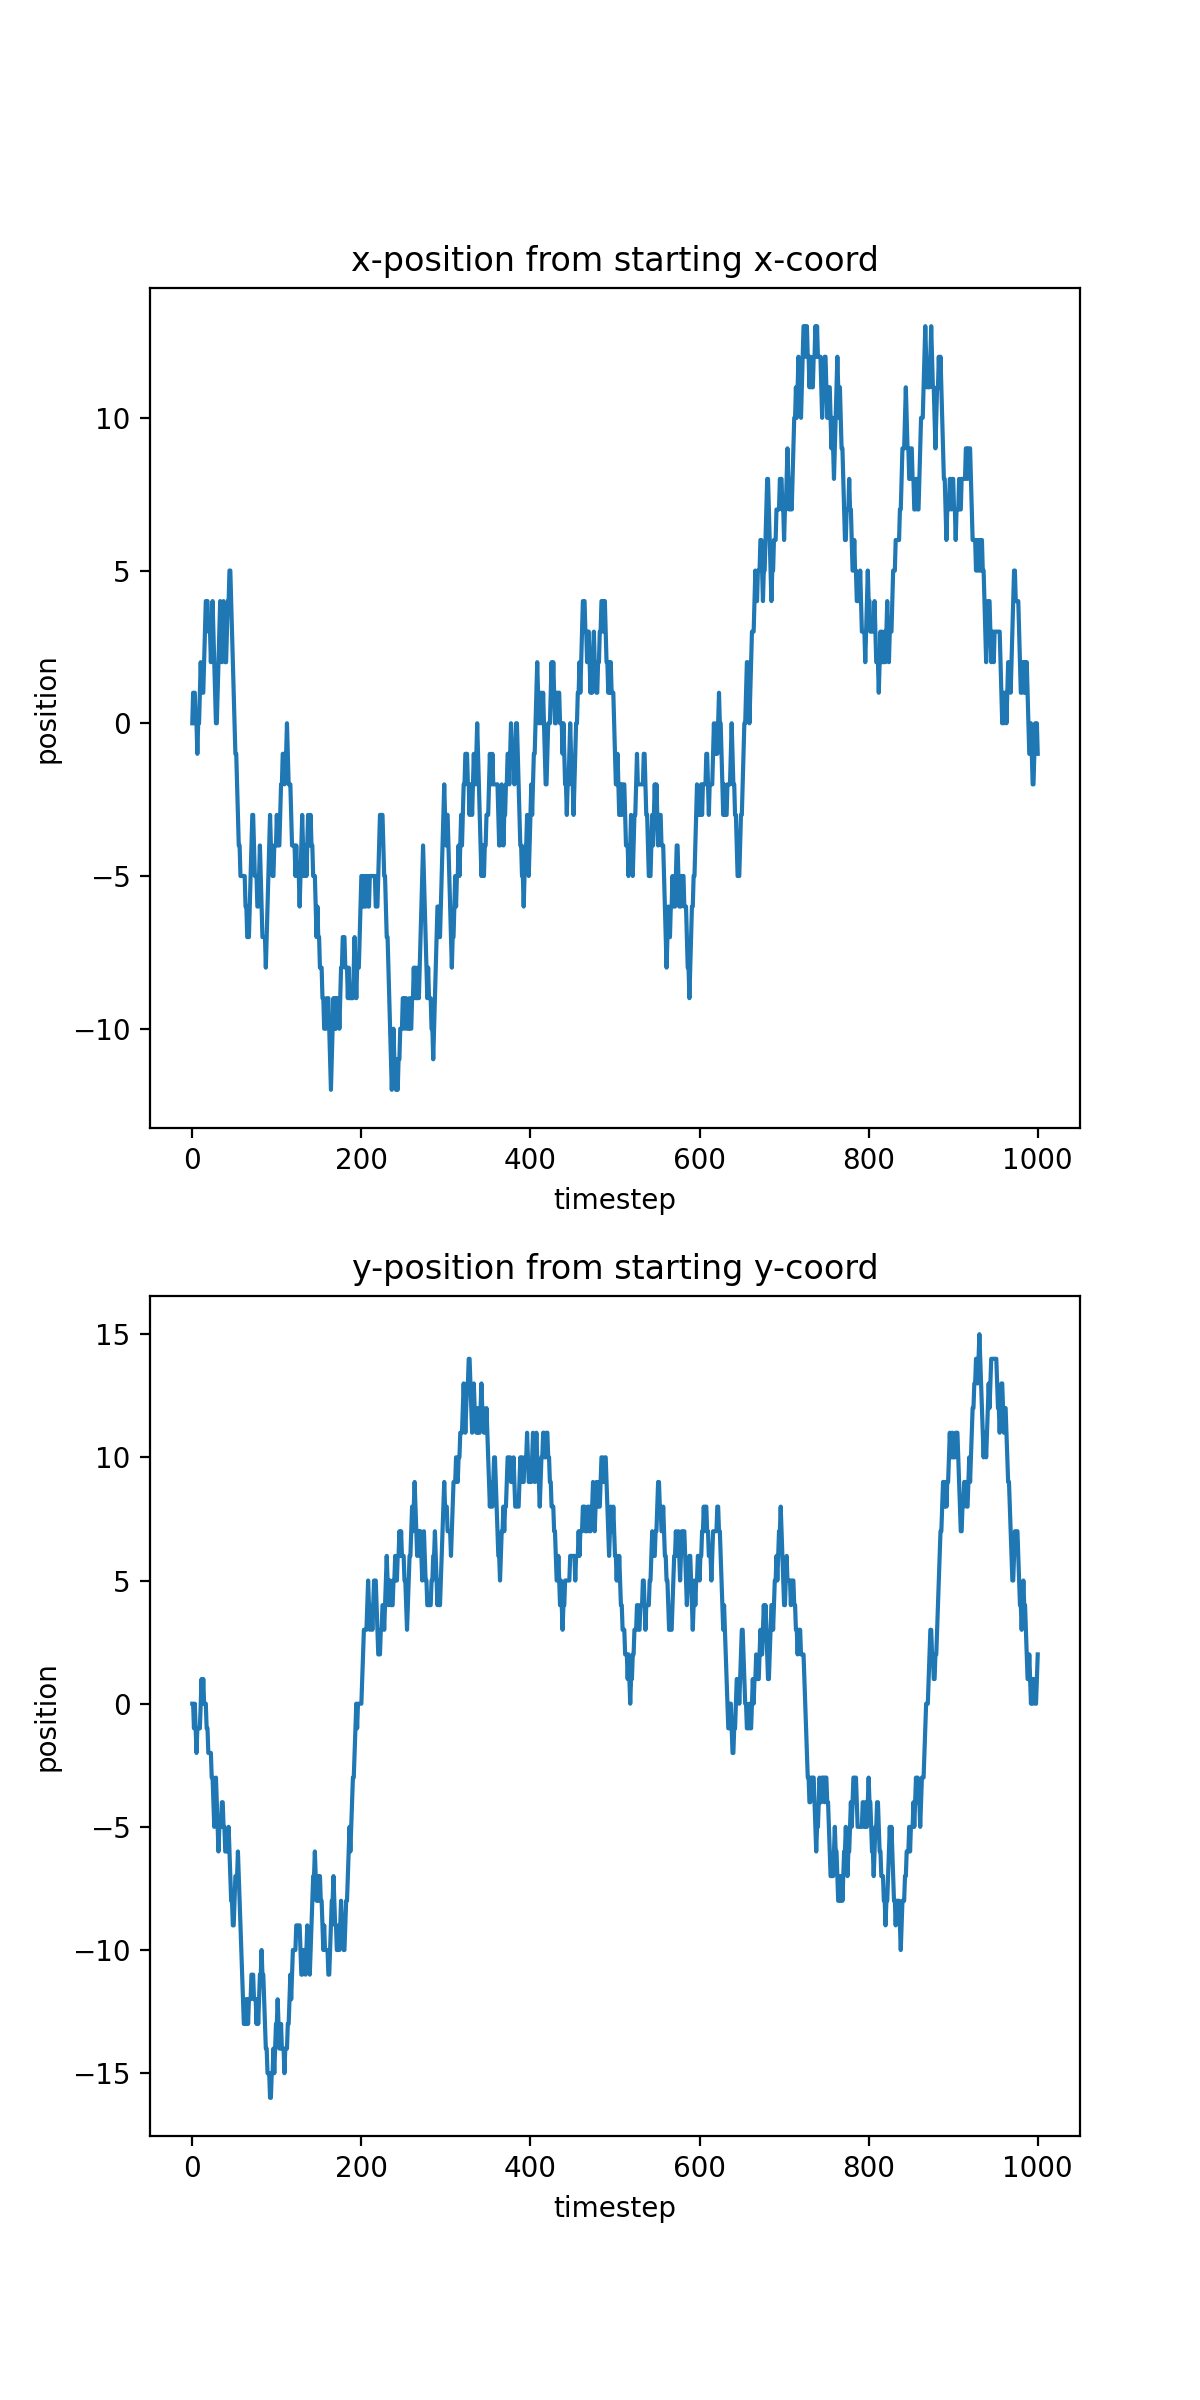

Text(0.5, 1.0, 'y-position from starting y-coord')

In [2]:
np.random.seed(0)

n = 200  # Size of grid
N = 10**4  # Number of particles
steps = 1000  # Timesteps

# Initialize the particles by giving them a random (x, y) position
# Also keep track of the distance travelled in both directions
x1 = np.random.randint(0, n, size=N)
y1 = np.random.randint(0, n, size=N)
x_dis = [0]
y_dis = [0]


# Evolution logic
def evolve(x, y, dx=None, dy=None):
    """
    Update the positions of the particles as they evolve through time.
    """
    x_update = np.random.choice((-1,0,1), size=len(x))  # New positions
    y_update = np.random.choice((-1,0,1), size=len(y))
    x += x_update  # Update the arrays
    y += y_update
    x %= n  # Ensure periodic boundary
    y %= n
    if dx != None and dy != None:  # Only if we need to keep track of the distance
        dx.append(dx[i] + x_update[0])
        dy.append(dy[i] + y_update[0])
    return None
        
# Evolve the particles in time
for i in range(steps):
    evolve(x1, y1, x_dis, y_dis)

# Plotting
plt.figure(figsize=(6, 12))
plt.subplot(2,1,1)
plt.plot(range(steps+1), x_dis)
plt.xlabel('timestep')
plt.ylabel('position')
plt.title('x-position from starting x-coord')

plt.subplot(2,1,2)
plt.plot(range(steps+1), y_dis)
plt.xlabel('timestep')
plt.ylabel('position')
plt.title('y-position from starting y-coord')

Shown above are plots of the x and y positions with respect to the starting coordinates evolving in time. A single particle is singled out for better visualization. In both directions, the position seems to wander around the starting coordinates. Occasionally, the particle goes more than 15 units away from its initial position, but it always comes back. This behavior is expected since with each iteration, the probability of the particle moving to one of the eight neighboring squares or staying in the same square is the same. Therefore, for a large number of timestep, the particle should stay close to the initial position.

The trajectory of all $10^4$ particles is animated below.

<IPython.core.display.Javascript object>


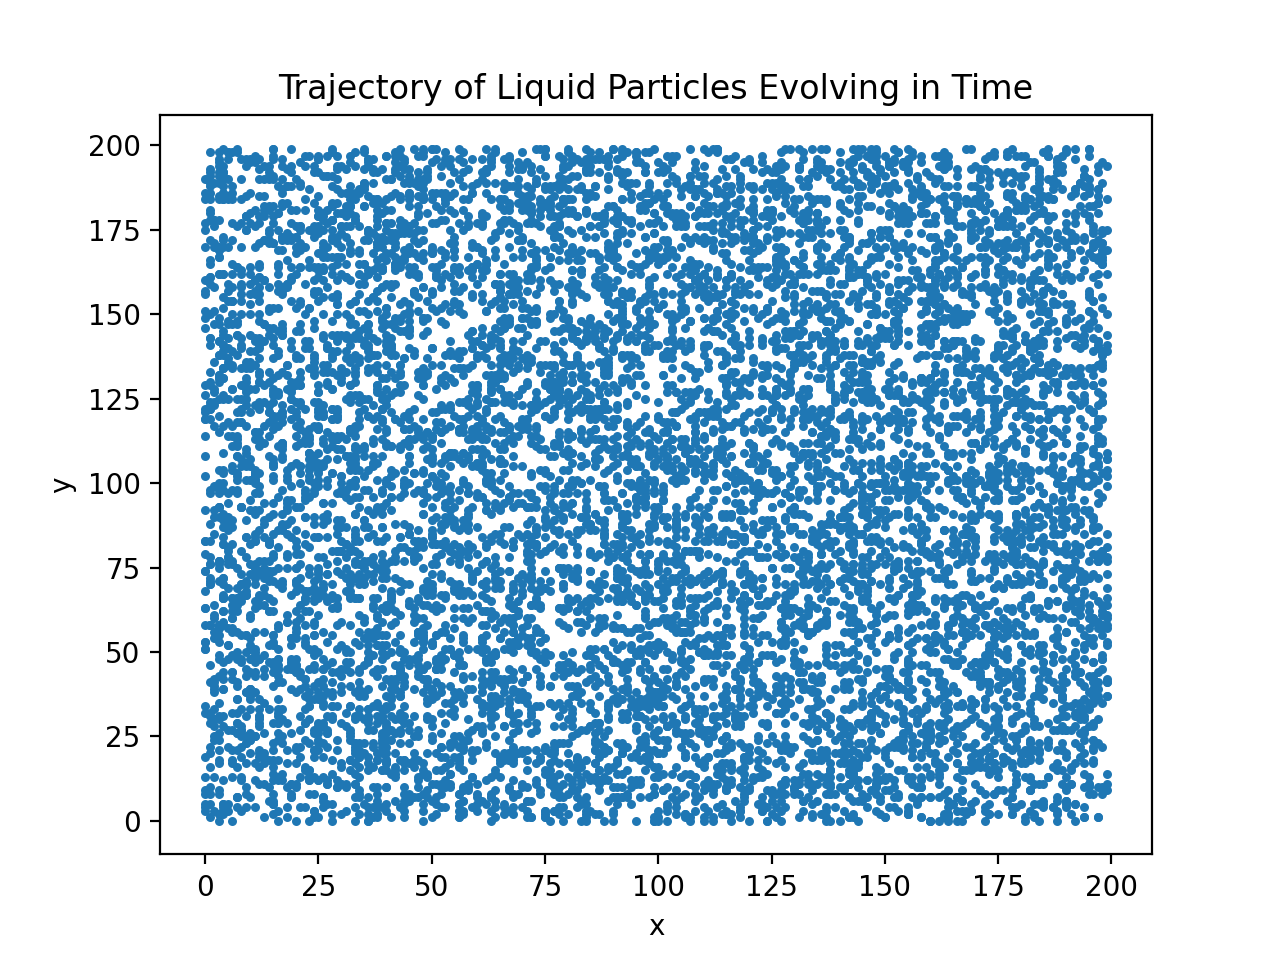

In [3]:
np.random.seed(0)

# New set of particles for plotting
x_plot = np.random.randint(0, 200, size=N)
y_plot = np.random.randint(0, 200, size=N)

# Evolution logic, same as above
def update(frame):
    global x_plot, y_plot
    x_plot += np.random.choice((-1,0,1), size=N)
    y_plot += np.random.choice((-1,0,1), size=N)
    x_plot %= 200
    y_plot %= 200
    scat.set_offsets(np.column_stack((x_plot, y_plot)))  # Update the scatter plot
    return scat

# Plotting
fig = plt.figure()
scat = plt.scatter(x_plot, y_plot, s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory of Liquid Particles Evolving in Time')
ani = FuncAnimation(fig=fig, func=update, frames=50, interval=100, repeat=False)

<IPython.core.display.Javascript object>


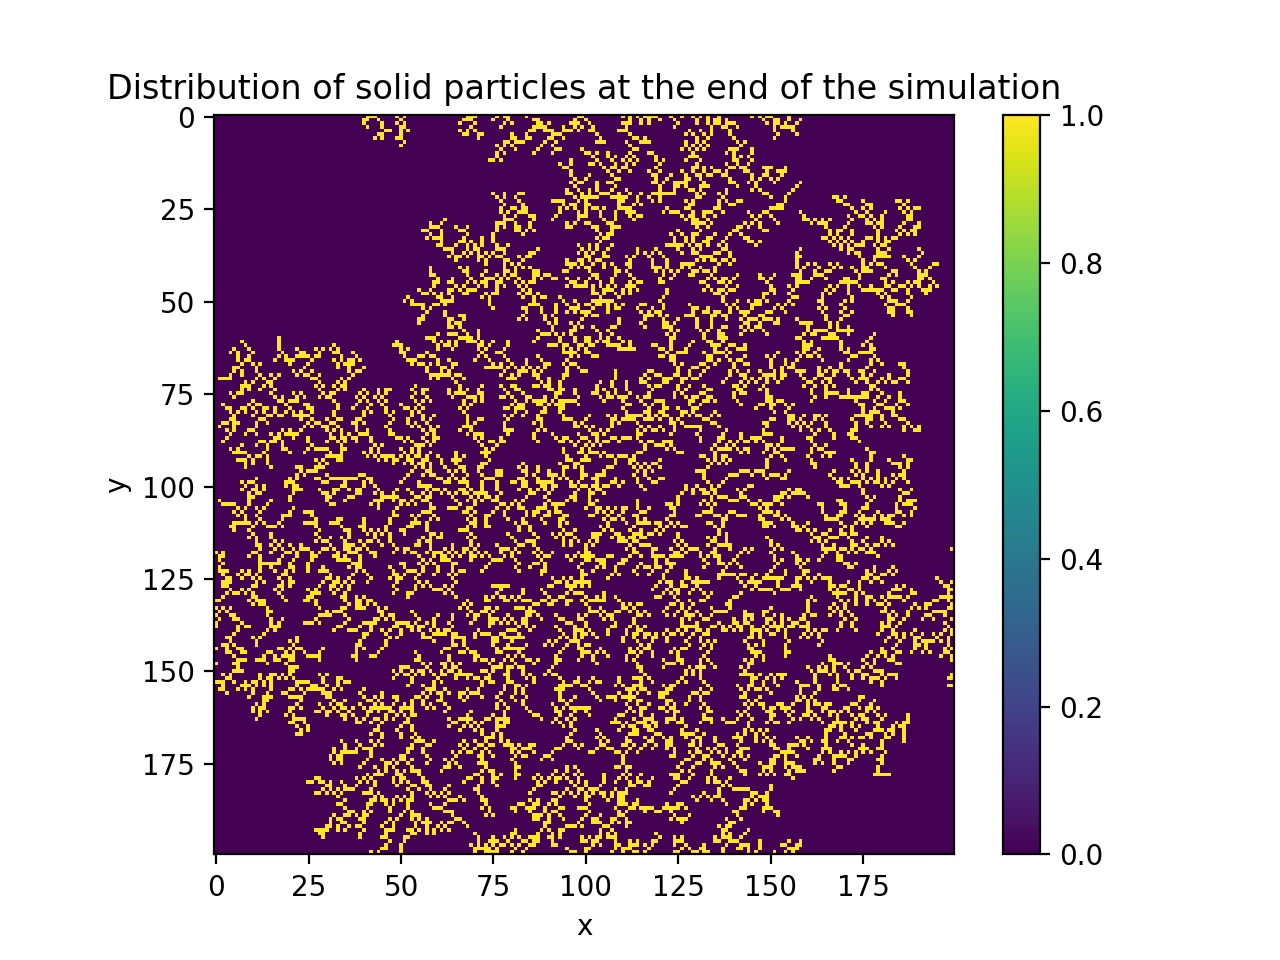

Text(0.5, 1.0, 'Distribution of solid particles at the end of the simulation')

In [4]:
np.random.seed(0)

solid_grid = np.zeros((n,n))  # Initialize the board of solids
solid_grid[n//2][n//2] = 1  # Initial solid particle
solid_count = [1]  # Keep track of the number of solid particles over time

# Initialize liquid particles
x2 = np.random.randint(0, n, size=N)
y2 = np.random.randint(0, n, size=N)

def neighbors(x, y):
    """
    For a given point with coordinates x and y, return its immediate neighbors as an array of points.
    """
    res = []
    x_coords = [(x-1)%n, x, (x+1)%n]
    y_coords = [(y-1)%n, y, (y+1)%n]
    for i in x_coords:
        for j in y_coords:
            res.append([i, j])
    return res

def solidify(x, y, grid):
    """
    Logic for solidifying the liquid particles. Examine the particles one by one to see if they need to solidify
    """
    pointer = 0
    removed = 0
    flag = True  # Boolean condition to update the pointer
    
    # Loop through the particles
    while pointer < len(x):
        x_curr, y_curr = x[pointer], y[pointer]  # Positions of the current particle of interest
        for point in neighbors(x_curr, y_curr):
            # If a solid particle is found, solidify the current particle
            # and remove it from the array of liquid particles
            if grid[point[0]][point[1]] == 1:
                grid[x_curr][y_curr] = 1
                x = np.delete(x, pointer)
                y = np.delete(y, pointer)
                removed += 1  # Update the count of solid particles
                flag = False
                break
        
        # Update pointer if the current particle doesn't solidify
        if flag:
            pointer += 1
        else:
            flag = True
    return removed, x, y


# Evolve the simulation until 80% become solid.
while solid_count[-1] / N < 0.8:
    evolve(x2, y2)
    new_solids, x2, y2 = solidify(x2, y2, solid_grid)
    solid_count.append(solid_count[-1] + new_solids)


# Plotting    
plt.imshow(solid_grid)
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Distribution of solid particles at the end of the simulation")

<IPython.core.display.Javascript object>


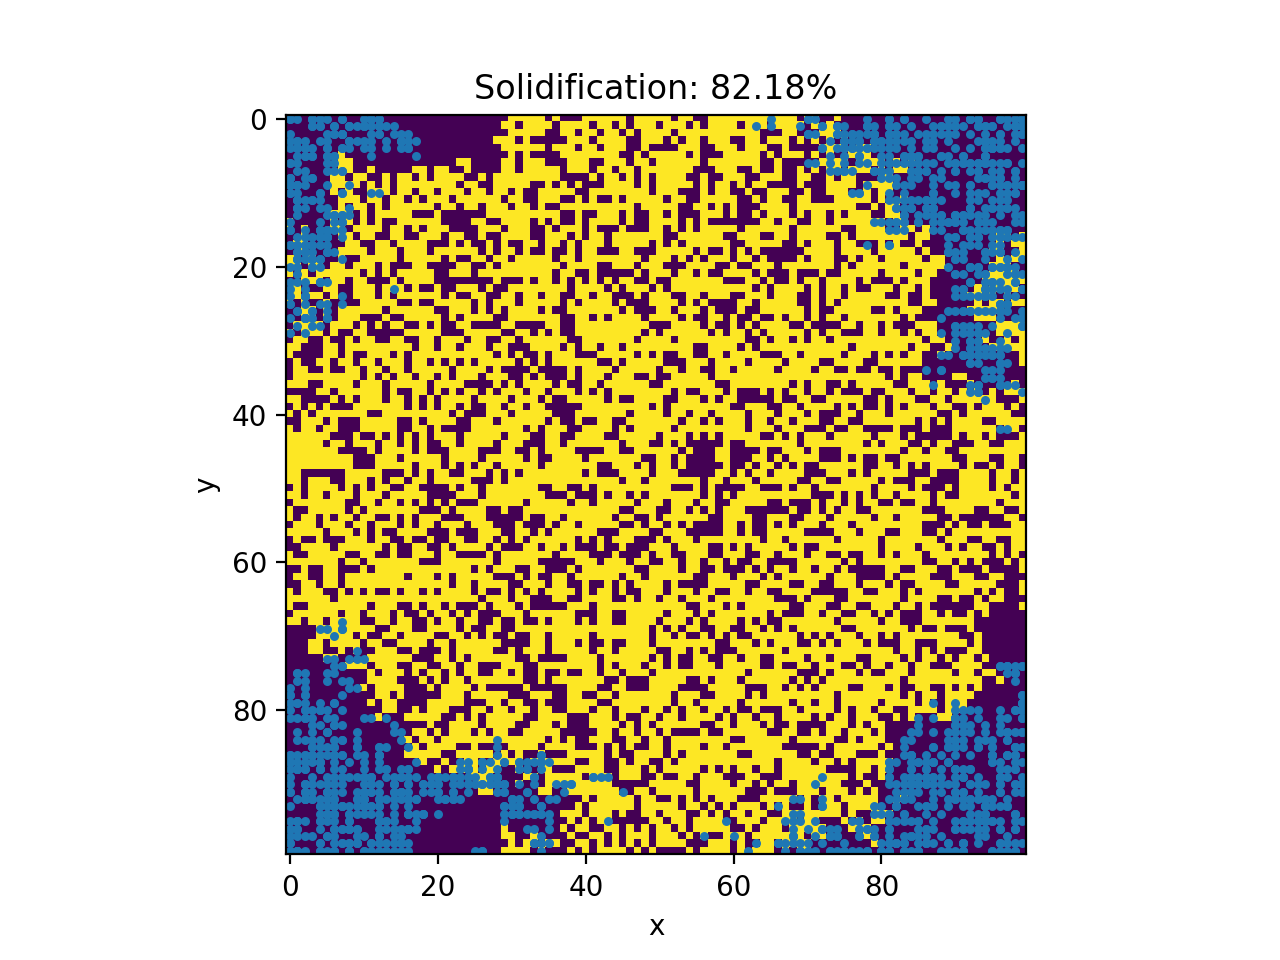

In [5]:
np.random.seed(0)

# For the sake of my slow laptop, only use a 100 x 100 grid.
# It's the same process just with a smaller grid.
n = 100

# New data for plotting
plot_grid = np.zeros((n,n))
plot_grid[n//2][n//2] = 1
plot_count = 1

x2plot = np.random.randint(0, n, size=N)
y2plot = np.random.randint(0, n, size=N)


# Evolution logic, same as above
def update2(frame):
    global plot_count, x2plot, y2plot
    if plot_count / 10**4 < 0.8:
        evolve(x2plot, y2plot)
        new, x2plot, y2plot = solidify(x2plot, y2plot, plot_grid)
        plot_count += new
    sc.set_offsets(np.column_stack((x2plot, y2plot)))  # Update scatter plot
    plt.imshow(plot_grid, cmap='viridis')
    plt.title(f'Solidification: {plot_count / (10**4):.2%}')
    return sc

# Plotting
fig= plt.figure()
sc = plt.scatter(x2plot, y2plot, s=5)
anim = FuncAnimation(fig, update2, frames=10, interval=100)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In the animation above, yellow dots are solid particles and blue dots are liquid particles. I'm not too sure why there are overlaps. It's probably due to the scatter plot being one iteration behind the contour plot. Otherwise it shows the 2D distribution of liquid and solid particles throughout the evolution.

<IPython.core.display.Javascript object>


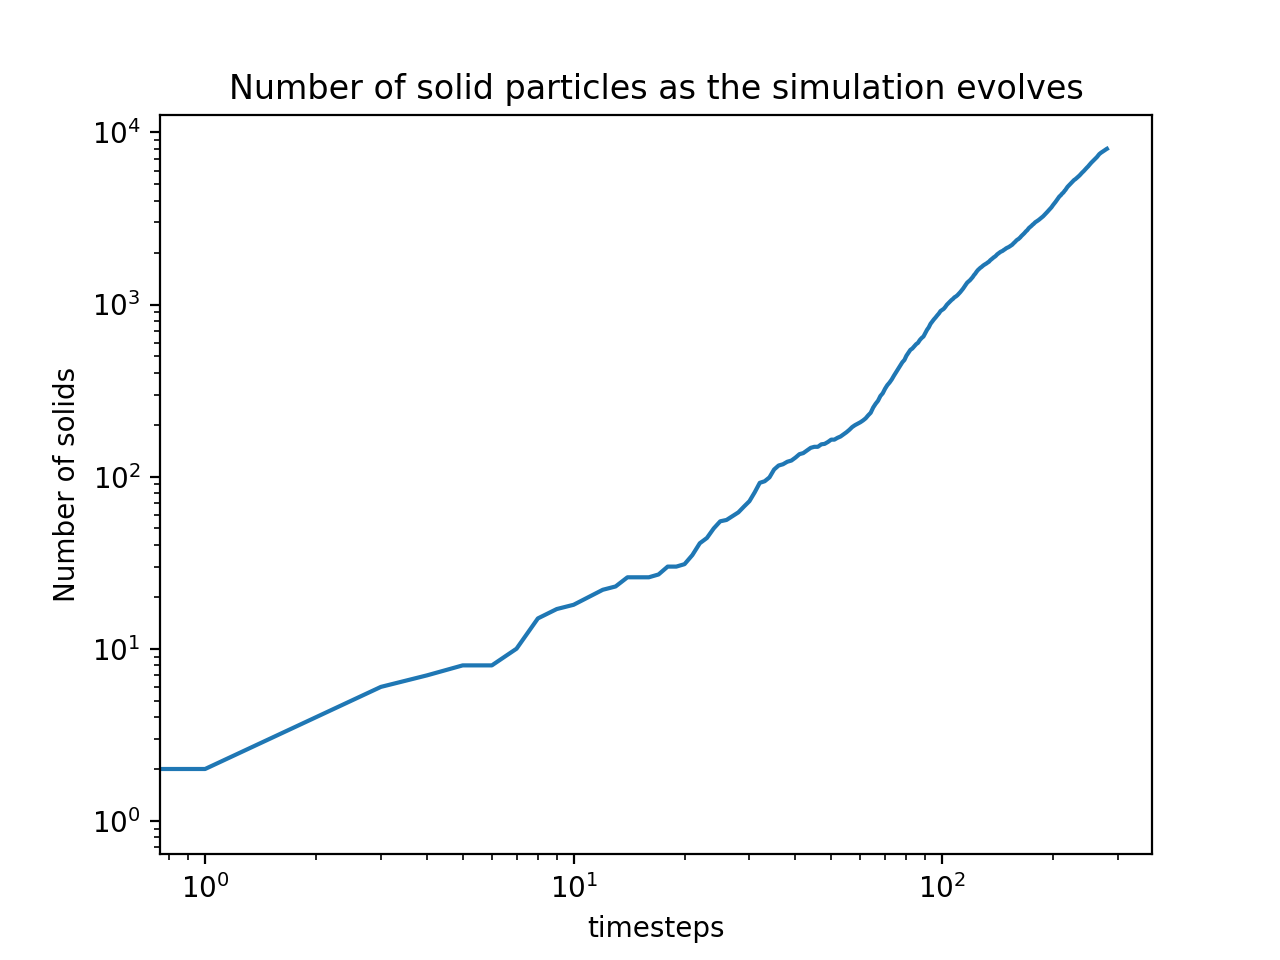

[]

In [6]:
times = np.arange(len(solid_count))
plt.plot(times, solid_count)
plt.xlabel("timesteps")
plt.ylabel("Number of solids")
plt.title("Number of solid particles as the simulation evolves")
plt.loglog()

From part (a), we can see that the liquid particles move randomly in the neighborhood of their initial positions. Since they are randomly generated, the density should be even across the board. Initially, a solid particle is planted in the middle of the board, and it "spreads" as time goes. For a uniform density of liquids, the rate at which the number of solid grows should be proportional to the circumference of the circle of solids, which scales linearly with the radius. As for the radius, the scaling is linear with respect to time, as particles can only solidify liquid particles in the immediate neighborhood. Therefore, the number of solid particles should have linear scaling in time. However, we can see from the plot that the scaling is approximately linear initially, and quadratic after 10 steps. This is not consistent with my analysis. My guess is that $10^4$ liquid particles is not enough to make the solidification process smooth. We can see in the plots above that there are holes in the circle of solids. This non-uniformity can be avoided with a larger sample of liquid particles. Also, this is only one random trial and I might have been unlucky with how the particles moved.

## Ising Model

In [106]:
N = 2*10**5  # Chain length
n = 20  # Lattice size

def energy_diff(lattice, i, j):
    """
    Calculate the energy difference when swapping the spin of a given lattice site
    """
    sum_neighbors = lattice[(i+1)%n, j] + lattice[i, (j+1)%n] + lattice[(i-1)%n, j] + lattice[i, (j-1)%n]
    return 2 * lattice[i, j] * sum_neighbors

def metropolis(lattice, temperature):
    """
    Metropolis-Hastings algorithm to get a chain of magnetization values.
    """
    M = np.zeros(N)
    M[0] = np.sum(lattice)
    for step in range(1, N):
        i, j = np.random.randint(0, n, size=2)  # Randomly choose lattice site
        dE = energy_diff(lattice, i, j)
        if dE < 0 or np.random.random() <= np.exp(-dE/temperature):
            lattice[i, j] *= -1
        M[step] = np.sum(lattice)
    return M/n**2

<IPython.core.display.Javascript object>


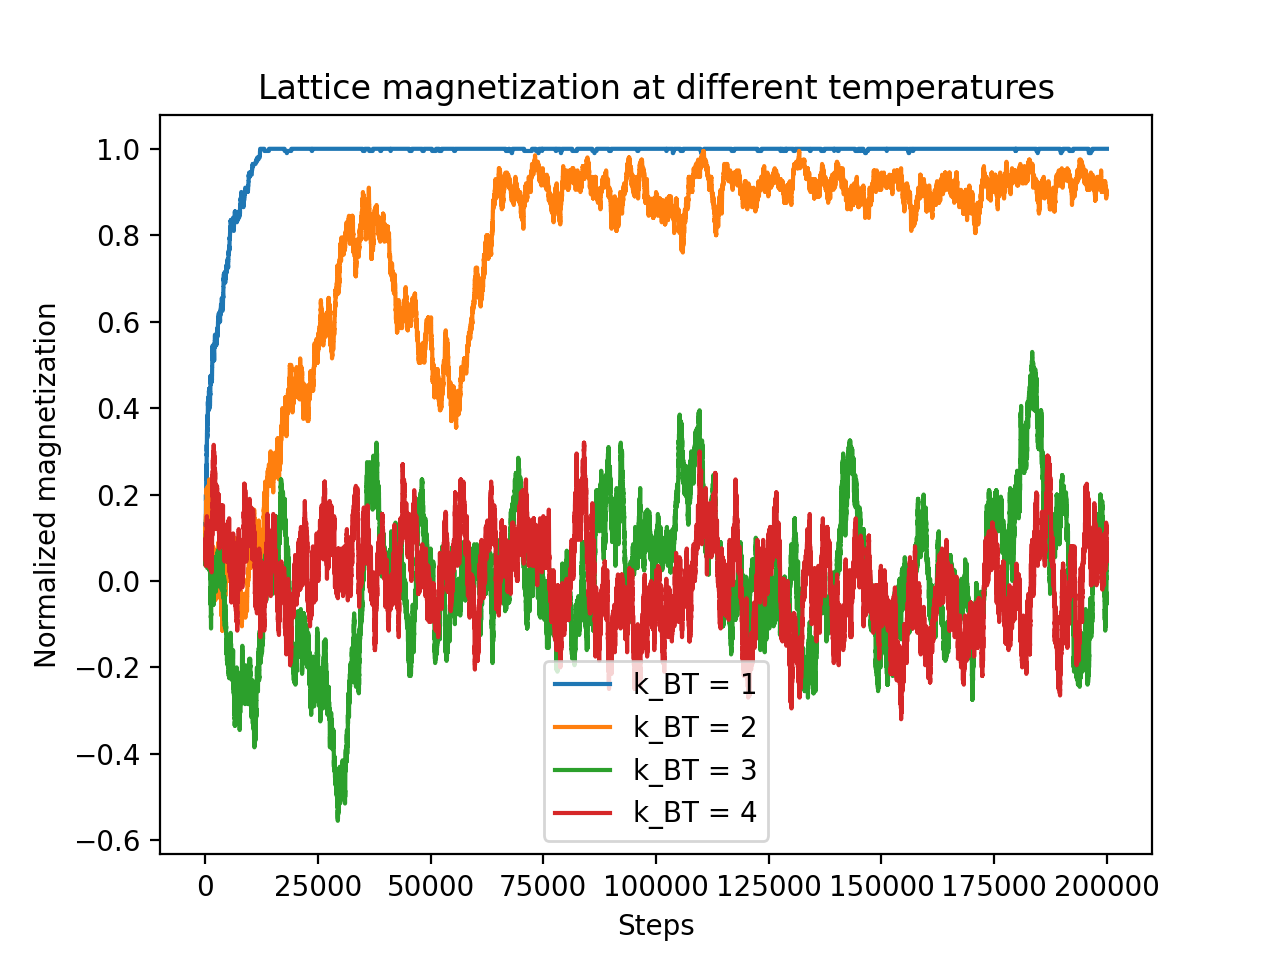

In [107]:
np.random.seed(0)

lattice = np.random.choice([-1, 1], size=(n, n))  # Generate a random lattice to start

for t in range(1,5): 
    clone = lattice.copy()
    magnetization = metropolis(clone, t)
    plt.plot(np.arange(N), magnetization, label = f'k_BT = {t}')

plt.xlabel("Steps")
plt.ylabel("Normalized magnetization")
plt.title("Lattice magnetization at different temperatures")
plt.legend()

We can clearly see the burn in phase for $k_BT = 1$ and $k_BT = 2$, although the MCMC apparently favoured the wrong direction in the latter case at around 50000 steps. The burn in phase is not obvious for the higher temperature values. This makes sense because the lattice is randomly generated, which means that the magnetization should be close to $0$ at the start. At low temperatures, spontaneous magnetization occurs, and the lattice sites align themselves. However, at temperatures above the critical temperature, the thermal fluctuations prevent spontaneous magnetization from happening. In our plot, we can observe the phase transition between $k_BT = 2$ and $k_BT = 3$. This means that the critical temperature is somewhere in between these values.